In [26]:
import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
import datetime
from dateutil.relativedelta import relativedelta
from datetime import datetime
import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import matplotlib.pyplot as plt# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [27]:
list_of_files = glob.glob('/Volumes/Elements/daily values/ARC/BUFN_GL/Daily_all_feature_BUFN_GL_nomissing.txt')  # create the list of file


In [28]:
list_of_files

['/Volumes/Elements/daily values/ARC/BUFN_GL/Daily_all_feature_BUFN_GL_nomissing.txt']

In [29]:
for i in range(len(list_of_files)):
    files=list_of_files[i]
    filename=files[43:68]
    print(filename)
    with open(files) as f:
        f=[x.strip() for x in f if x.strip()]
        data=[tuple(map(float,x.split())) for x in f[0:]]
        year=np.array([x[0] for x in data])
        mon=np.array([x[1] for x in data])
        day=np.array([x[2] for x in data])
        swd=np.array([x[3] for x in data])
        swu=np.array([x[4] for x in data])
        lwd=np.array([x[5] for x in data])
        lwu=np.array([x[6] for x in data])
        ppt=np.array([x[7] for x in data])
        t=np.array([x[8] for x in data])
        q=np.array([x[9] for x in data])
        u=np.array([x[10] for x in data]) 
        v=np.array([x[11] for x in data])
        aod=np.array([x[12] for x in data])
        bc=np.array([x[13] for x in data]) 
        ice=np.array([x[14] for x in data]) 
       # bufn=np.array([x[15] for x in data]) 

Daily_all_feature_BUFN_GL


In [30]:
climate=np.zeros((len(aod),11))  
climate[:,1]=swd;climate[:,2]=swu; climate[:,3]=lwd; climate[:,4]=lwu ; climate[:,5]=ppt;climate[:,6]=t;climate[:,7]=q;climate[:,8]=u;climate[:,9]=v;climate[:,10]=aod;climate[:,0]=bc   
Mort= ice
climate=climate[:,1:10]

In [32]:
Mort

array([768554.7 , 763360.68, 762279.08, ..., 569350.87, 576200.98,
       580887.28])

In [33]:
cols = ['SWD', 'SWU', 'LWD', 'LWU', 'PPT','T', 'Q', 'U', 'V']
from sklearn.model_selection import train_test_split

X_train= climate[1001:6209,:]; X_test=climate[0:1000,:]; y_train=Mort[1001:6209]; y_test =Mort[0:1000]
print(np.shape(X_train), np.shape(X_test))

(5208, 9) (1000, 9)


In [34]:
#from sklearn.preprocessing import MinMaxScaler

#mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
print(np.sum(X_test_std[:,1]))

-1.4495071809506044e-12


MLR
[ 158017.46410009  -22198.54539055  275496.36586455 -216016.10635569
    3835.24734787  -56328.09984822 -214189.10313762   14567.39994764
  -13162.38436683]
0.8271125412013554


<BarContainer object of 9 artists>

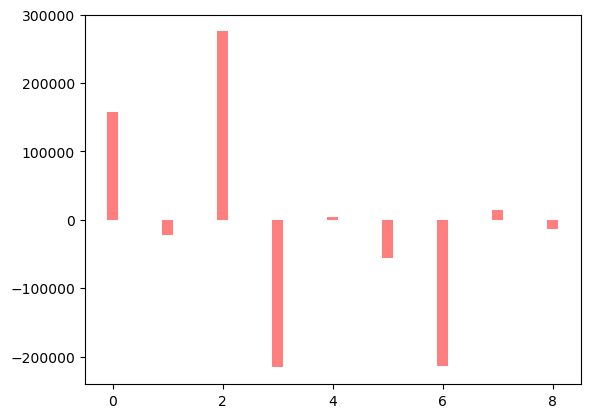

In [35]:
#get the coefficients
print('MLR')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fitting the model
model.fit(X_train_std,y_train)
print(model.coef_)
print(model.score(X_train_std,y_train))
#print(X_train_std[:,0])


x_pos = np.arange(len(cols))
CTEs = model.coef_
#error = BCe
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, width=0.2,align='center', alpha=0.5, ecolor='black', capsize=10,color='red')
#ax.set_yticks(CTEs,fontsize=20)


SpearmanrResult(correlation=0.9906785916131398, pvalue=0.0)
SpearmanrResult(correlation=-0.5466020994406412, pvalue=0.0)
SpearmanrResult(correlation=-0.549420874361688, pvalue=0.0)


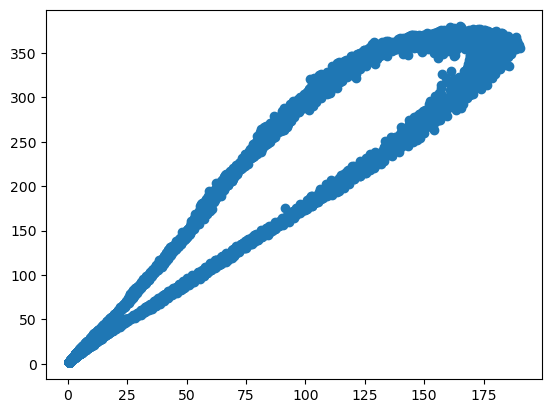

In [36]:
import scipy.stats
plt.scatter(swu,swd)  
print(scipy.stats.spearmanr(lwu,lwd) ) 
print(scipy.stats.spearmanr(Mort,lwd) ) 
print(scipy.stats.spearmanr(lwu,Mort) ) 

In [37]:
predictions = model.predict(X_test_std)

print('Test accuracy:', model.score(X_test_std, y_test))



from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(predictions,y_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(predictions,y_test))

Test accuracy: 0.7906250968496216
Mean squared error: 13243568874.14
Coefficient of determination: 0.51


MLR plot
953516.77 859839.2150605544
13243568874.139252


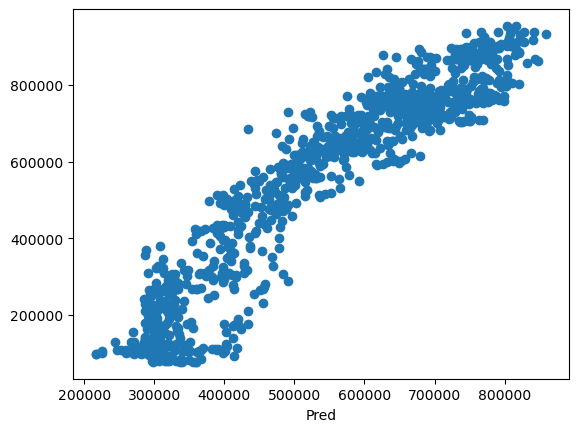

In [38]:
print('MLR plot')
plt.scatter(predictions,y_test)
plt.ylim=[0,14000000]
plt.xlim=[0,14000000]
print(np.max(y_test),np.max(predictions))
mse = mean_squared_error(predictions,y_test)
plt.xlabel('Pred')
print(mse)

ridge regression


Text(0.5, 1.0, 'Ridge')

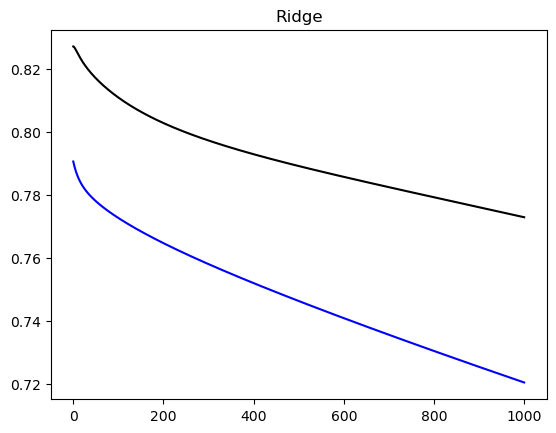

In [39]:
print('ridge regression')
xx=[];yy=[];zz=[]
from sklearn.linear_model import Ridge
for i in range(1,10000,1):
 ridge = Ridge(alpha=i/10)
 ridge.fit(X_train_std,y_train)
 #print(i)
# print(ridge.score(X_train_std,y_train))
 #print(ridge.score(X_test_std,y_test))
 xx.append(i/10)  
 yy.append(ridge.score(X_train_std,y_train))
 zz.append(ridge.score(X_test_std,y_test))
 
plt.plot(xx,yy,c='k')
plt.plot(xx,zz,c='b')
plt.title('Ridge')

ridge model traing and coeeficients
0.8170343353338888
0.777982133693942
Mean squared error: 14043272901.73


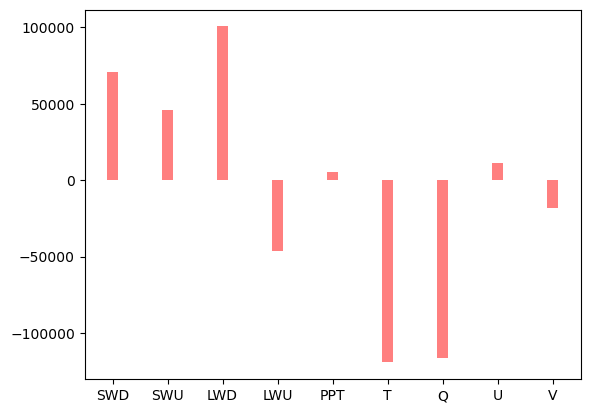

In [46]:
print('ridge model traing and coeeficients')

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=50)
ridge.fit(X_train_std,y_train)

print(ridge.score(X_train_std,y_train))
print(ridge.score(X_test_std,y_test))

x_pos = np.arange(len(cols))
CTEs = ridge.coef_
#error = BCe
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, width=0.2,align='center', alpha=0.5, ecolor='black', capsize=10,color='red',label='BC Days')
ax.set_xticks(x_pos,fontsize=20)

ax.set_xticklabels(cols,fontsize=10)
#ax.set_title('Sep 2019 - Feb 2020',fontsize=20)



Ridge regression plot of testing data
Mean squared error: 14043272901.73
953516.77
Mean squared error: 14043272901.73


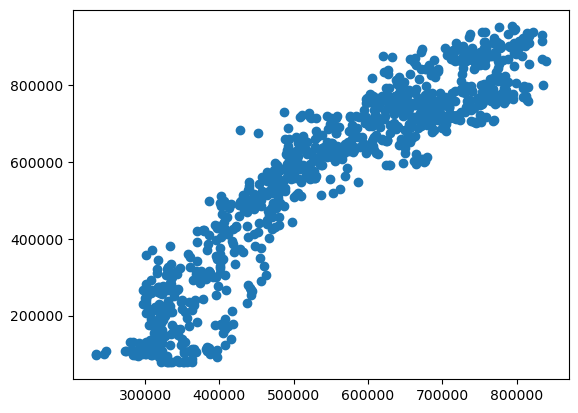

In [49]:
print('Ridge regression plot of testing data')
predictions = ridge.predict(X_test_std)
#print('Test accuracy:', ridge.score(X_test_std, y_test))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(predictions,y_test))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(predictions,y_test))
plt.scatter(predictions,y_test)
plt.ylim=[0,14000000]
plt.xlim=[0,14000000]
print(np.max(y_test))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(predictions,y_test))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(predictions,y_test))

EN Regression


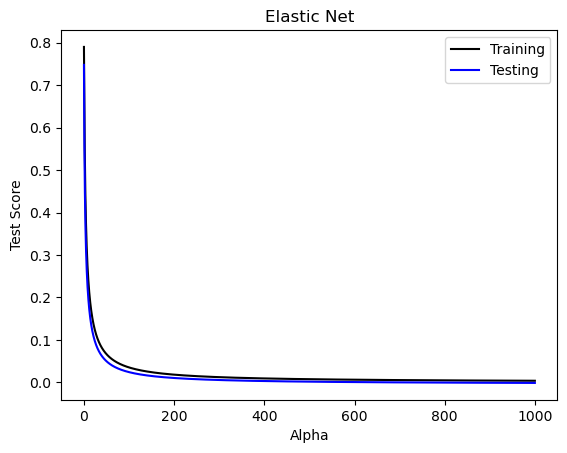

In [50]:
print('EN Regression' )
xx=[];yy=[];zz=[]
from sklearn.linear_model import ElasticNet

for i in range(1,10000,1):
 ridge = ElasticNet(alpha=i/10,l1_ratio=0.1)
 ridge.fit(X_train_std,y_train)
 xx.append(i/10)  
 yy.append(ridge.score(X_train_std,y_train))
 zz.append(ridge.score(X_test_std,y_test))

plt.plot(xx,yy,c='k',label='Training')
plt.plot(xx,zz,c='b',label="Testing")
plt.xlabel('Alpha')
plt.ylabel('Test Score')
plt.title('Elastic Net')
plt.legend(loc='upper right')  
#plt.ylim(0.0,1.0)

EN model trainig and coeffcients
[ 56450.79889879  60902.8166112   15906.03451986 -29883.87217152
   5247.19415273 -91383.52480206 -70612.19292808  11262.6955504
 -21660.1040352 ]
0.799242321586347
0.7605072059160797
Test accuracy: 0.7605072059160797
Mean squared error: 15148612682.74


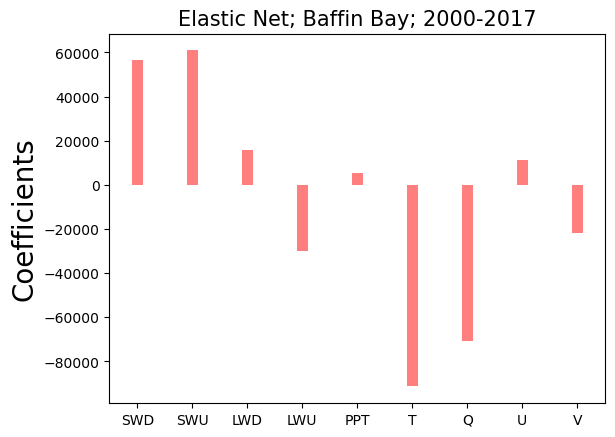

In [51]:
print('EN model trainig and coeffcients')
from sklearn.linear_model import ElasticNet
ridge = ElasticNet(alpha=0.1,l1_ratio=0.5) 
ridge.fit(X_train_std,y_train)#FOR BA (alpha=0.01,l1_ratio=0.1)
print(ridge.coef_)
print(ridge.score(X_train_std,y_train))
print(ridge.score(X_test_std,y_test))
x_pos = np.arange(len(cols))
CTEs = ridge.coef_
#error = BCe
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, width=0.2,align='center', alpha=0.5, ecolor='black', capsize=10,color='red',label='BC Days')
ax.set_xticks(x_pos,fontsize=20)
ax.set_ylabel('Coefficients',fontsize=20)
ax.set_xticklabels(cols,fontsize=10)
ax.set_title('Elastic Net; Baffin Bay; 2000-2017',fontsize=15)


predictions = ridge.predict(X_test_std)
print('Test accuracy:', ridge.score(X_test_std, y_test))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(predictions,y_test))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(predictions,y_test))

EN plot of testing data
953516.77
Mean squared error: 15148612682.74


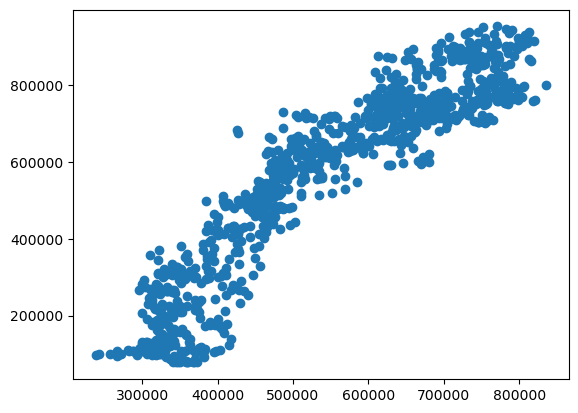

In [52]:
print('EN plot of testing data')
plt.scatter(predictions,y_test)
plt.ylim=[0,14000000]
plt.xlim=[0,14000000]
print(np.max(y_test))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(predictions,y_test))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(predictions,y_test))